In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
bos['PRICE'] = boston.target

In [10]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Import linear regression from sci-kit learn module.

In [11]:
from sklearn.linear_model import LinearRegression

X = bos.drop('PRICE', axis = 1 )
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [12]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print("Estimated intercept co-efficient :", lm.intercept_)

Estimated intercept co-efficient : 36.49110328036135


In [15]:
 print("No of Co-efficients :", len(lm.coef_))

No of Co-efficients : 13


In [16]:
pd.DataFrame(list(zip(X.columns, lm.coef_)),)

,0,1
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


 RM and prices has high correlation. scatter plot between prices and RM.

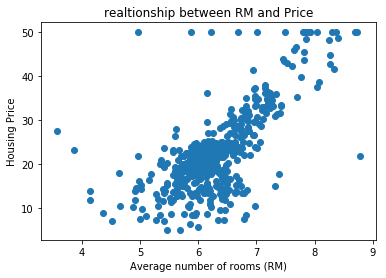

In [17]:
plt.scatter(bos.RM, bos.PRICE)
plt.xlabel("Average number of rooms (RM)")
plt.ylabel("Housing Price")
plt.title("realtionship between RM and Price")
plt.show()

In [18]:
lm.predict(X)[0:5]

array([30.00821269, 25.0298606 , 30.5702317 , 28.60814055, 27.94288232])

Text(0.5,1,'Prices vs Predicted Prices: $Y_i$ vs $\\hat{Y}_i$')

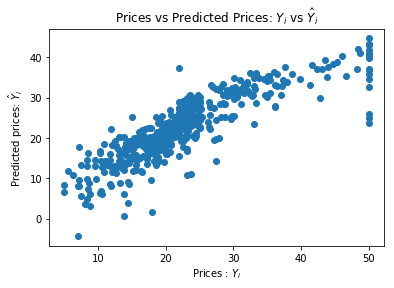

In [19]:
plt.scatter(bos.PRICE, lm.predict(X))
plt.xlabel("Prices : $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted Prices: $Y_i$ vs $\hat{Y}_i$")

there is some error in the prediction as the housing prices increase.

In [20]:
mseFull = np.mean((bos.PRICE - lm.predict(X)) ** 2)
print(mseFull)

21.897779217687496


mean squared error calculation

In [21]:
lm = LinearRegression()
lm.fit(X[['PTRATIO']] , bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
msePTRATIO = np.mean((bos.PRICE - lm.predict(X[['PTRATIO']])) ** 2)
print(msePTRATIO)

62.65220001376927


The mean squared error has increased. So this shows that a single feature is not a good predictor of housing prices.

Spliting the dataset to train-test 

In [23]:
X_train = X[:50]
X_test  = X[-50:]

y_train = bos.PRICE[:50]
y_test  = bos.PRICE[-50:]

print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(50, 13)
(50,)
(50, 13)
(50,)


In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, bos.PRICE, test_size=.33, random_state = 5)

In [25]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(339, 13)
(339,)
(167, 13)
(167,)


In [26]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
pred_train = lm.predict(X_train)
pred_test = lm.predict(X_test)


In [28]:
print("Fit a model X_train, and calculate MSE with Y_train:", np.mean((y_train  - lm.predict(X_train)) ** 2))
print("Fit a model X_train, and calculate MSE with X_test, Y_test:", np.mean((y_test  - lm.predict(X_test)) ** 2))

Fit a model X_train, and calculate MSE with Y_train: 19.546758473534684
Fit a model X_train, and calculate MSE with X_test, Y_test: 28.541367275618253


Text(0,0.5,'Residuals')

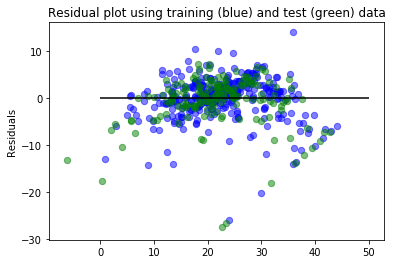

In [29]:
plt.scatter(lm.predict(X_train), lm.predict(X_train) - y_train, c='b', s=40, alpha=0.5)
plt.scatter(lm.predict(X_test), lm.predict(X_test) - y_test, c='g', s=40, alpha=0.5)
plt.hlines(y=0, xmin=0, xmax =50)
plt.title('Residual plot using training (blue) and test (green) data')
plt.ylabel('Residuals')